In [6]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt
from random import shuffle

class Event:
    def __init__(self, time, action, bm):
        self.time = time
        self.action = action
        self.bm = bm
    def __lt__(self, other):
        return (self.time, self.bm) < (other.time, other.bm)
    def __le__(self, other):
        return (self.time, self.bm) <= (other.time, other.bm)

def shuffle0(passengers):
    for i in range(len(passengers)):
        x = [j for j in range(len(passengers[i]))]
        shuffle(x)
        passengers[i] = [passengers[i][k] for k in x]

def calc_pic(grah, ListeColor, ListeSize):
    nx.draw_kamada_kawai(graph, with_labels = True, node_color = ListeColor, node_size = ListeSize)

In [7]:
def solve(eventq, passengers, bms, graph):
    ListeNodes = list(graph.node)
    ListeColor = ['blue']*len(ListeNodes)
    #save(passengers, bms)
    while eventq:
        # Abbruch Bedingung
        if ([len(passengers[i]) == 0 for i in range(len(passengers))] == [True]*len(passengers)) and ([bms[i]['n_passengers'] == 0 for i in range(len(bms))] == [True]*len(bms)):
            return print('Ende')
        event = hq.heappop(eventq)
        bm = bms[event.bm]
        current_node = bm['itinerary'][bm['stop'] % len(bm['itinerary'])]
        next_node = bm['itinerary'][(bm['stop']+1) % len(bm['itinerary'])]
        current_node_time_idx = (bm['stop'] % len(bm['itinerary']))%len(bm['t_times'])
        print('Fahrzeug {} ist am Knoten {}, der nächste Halt {}'.format(bm['name'],current_node, next_node))
        
        ListeSize = [len(i)*100 for i in passengers]
        ListeColor[current_node] = bm['color']
        calc_pic(graph, ListeColor, ListeSize)
        plt.savefig("img/{}.png".format(event.time))
        plt.show()
        ListeColor[current_node] = 'blue'
        
        if event.action == 'load':
            free = bm['capacity'] - bm['n_passengers']
            print('Fahrzeug {} load'.format(bm['name']))
            print('Fahrzeug {} hat {} Plätze frei'.format(bm['name'],free))
            while bm['n_passengers'] < bm['capacity']:
                waiting = [idx for idx, passenger in enumerate(passengers[current_node]) if passenger['station'] in bm['itinerary']]
                #print('Warten: {}'.format(waiting))
                if not waiting:
                    break
                passenger = passengers[current_node].pop(waiting[0])
                print('Passagier:', passenger)
                bm['n_passengers'] += 1
                hq.heappush(eventq, Event(event.time + passenger['exit_time'],'exit', event.bm))
                print('time:', event.time+passenger['exit_time'])
            hq.heappush(eventq, Event(event.time + bm['t_times'][current_node_time_idx], 'load', event.bm))
            bm['stop'] += 1
        #ListeColor[current_node] = 'blue'
        # Generate events for exiting passengers
        elif event.action == 'exit':
            print('Fahrzeug {}, Passagiere steigen aus, time {}'.format(bm['name'], event.time))
            bm['n_passengers'] -= 1
            print('Es sind {} Passagiere in der Bahn'.format(bm['n_passengers']))
        else:
            raise Exception('Unknown event action')

In [8]:
graph = nx.Graph()

graph.add_node('A')
graph.add_node('B')
graph.add_node('C')

ListeNodes = list(graph.node)

graph.add_edge(ListeNodes[0],ListeNodes[1])
graph.add_edge(ListeNodes[1],ListeNodes[0])
graph.add_edge(ListeNodes[0],ListeNodes[2])
graph.add_edge(ListeNodes[1],ListeNodes[0])
graph.add_edge(ListeNodes[1],ListeNodes[2])
graph.add_edge(ListeNodes[2],ListeNodes[1])


In [9]:
passengers = [#
    [{'station': 1, 'exit_time': 10}]*20 + [{'station': 2, 'exit_time': 20}]*20,  # 0 => Station 'A'
    [{'station': 0, 'exit_time': 20}]*20 + [{'station': 2, 'exit_time': 10}]*20, # 1 => Station 'B'
    [{'station': 0, 'exit_time': 10}]*20 + [{'station': 1, 'exit_time': 20}]*20  # 2 => Station 'C'
              ]#
bms = [{'color': '#fff000', 'n_passengers': 0, 'capacity': 5, 'stop': 0, 'itinerary': [2, 1, 0], 'name': 0, 't_times': [12, 12, 12]},
    {'color': '#ff00f0', 'n_passengers': 0, 'capacity': 5, 'stop': 0, 'itinerary': [0, 1, 2, 1], 'name': 1, 't_times': [12, 12, 12]}
       ]#

 
# shuffle passengers
shuffle0(passengers)


event0 = Event(0,'load',0)
event1 = Event(0,'load',1)
eventq = []
hq.heappush(eventq, event0)
hq.heappush(eventq, event1)

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


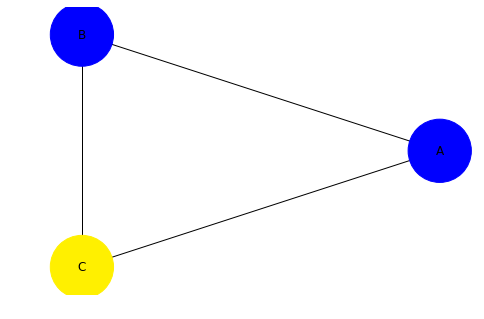

Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 10
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 0, 'exit_time': 10}
time: 10
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 0, 'exit_time': 10}
time: 10
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


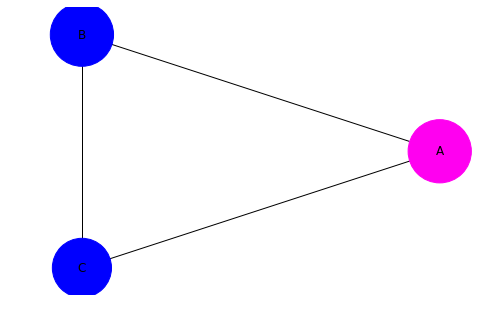

Fahrzeug 1 load
Fahrzeug 1 hat 5 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 10
Passagier: {'station': 1, 'exit_time': 10}
time: 10
Passagier: {'station': 2, 'exit_time': 20}
time: 20
Passagier: {'station': 2, 'exit_time': 20}
time: 20
Passagier: {'station': 2, 'exit_time': 20}
time: 20
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


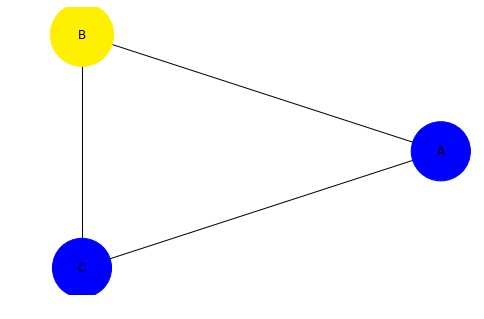

Fahrzeug 0, Passagiere steigenaus, time 10
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


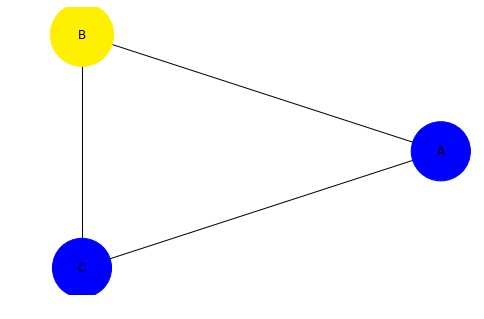

Fahrzeug 0, Passagiere steigenaus, time 10
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


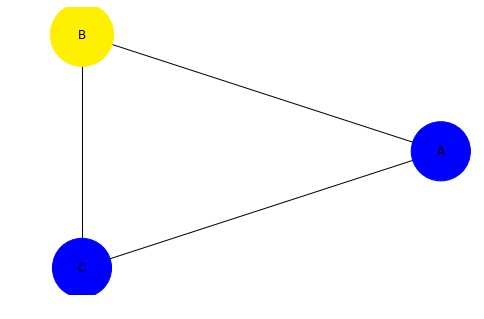

Fahrzeug 0, Passagiere steigenaus, time 10
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


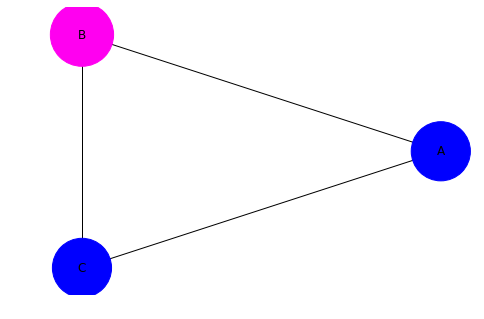

Fahrzeug 1, Passagiere steigenaus, time 10
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


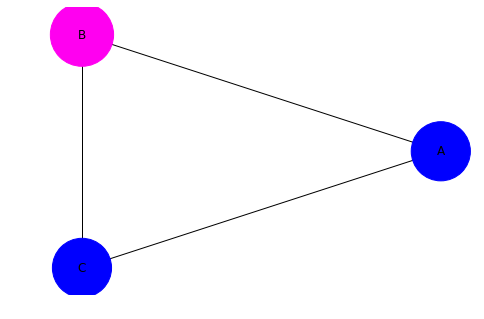

Fahrzeug 1, Passagiere steigenaus, time 10
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


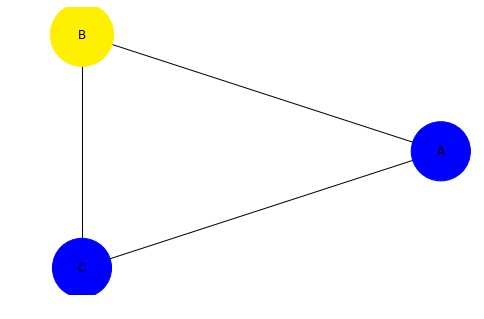

Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 32
Passagier: {'station': 2, 'exit_time': 10}
time: 22
Passagier: {'station': 0, 'exit_time': 20}
time: 32
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


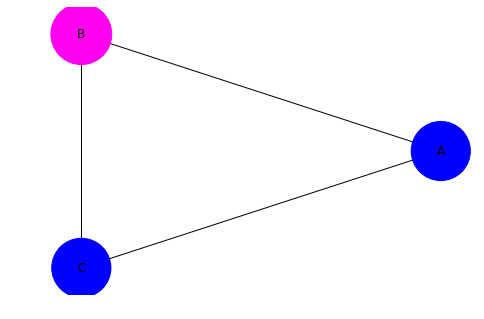

Fahrzeug 1 load
Fahrzeug 1 hat 2 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 32
Passagier: {'station': 2, 'exit_time': 10}
time: 22
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


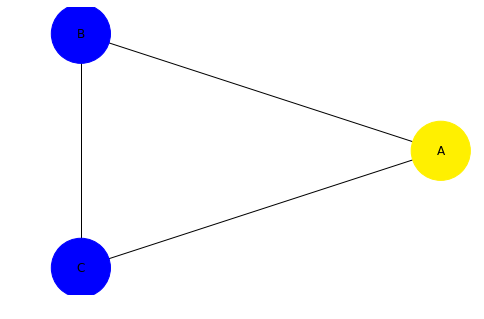

Fahrzeug 0, Passagiere steigenaus, time 20
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


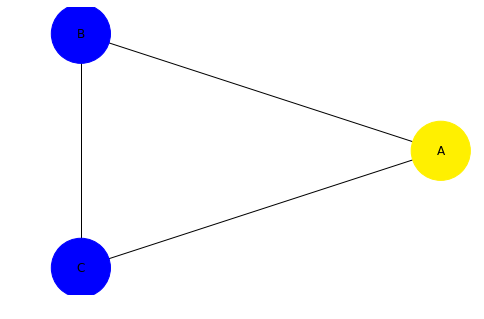

Fahrzeug 0, Passagiere steigenaus, time 20
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


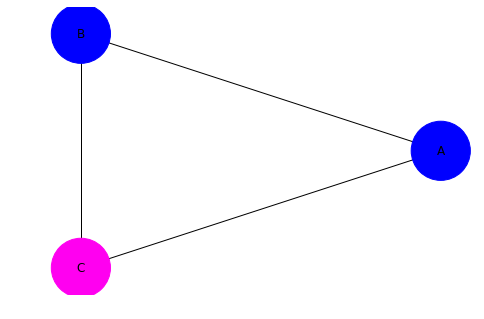

Fahrzeug 1, Passagiere steigenaus, time 20
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


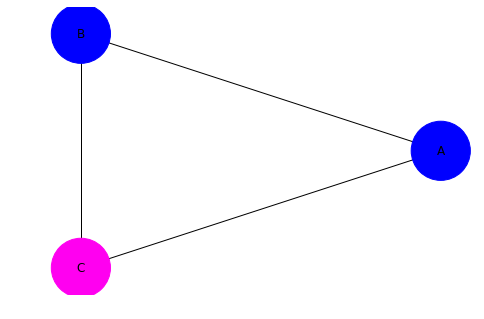

Fahrzeug 1, Passagiere steigenaus, time 20
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


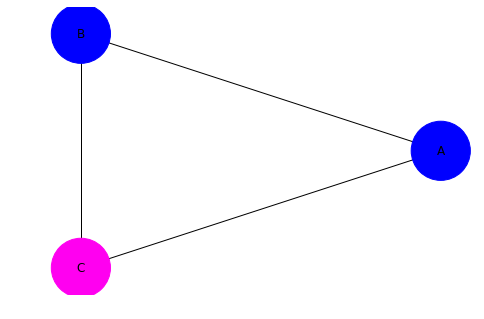

Fahrzeug 1, Passagiere steigenaus, time 20
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


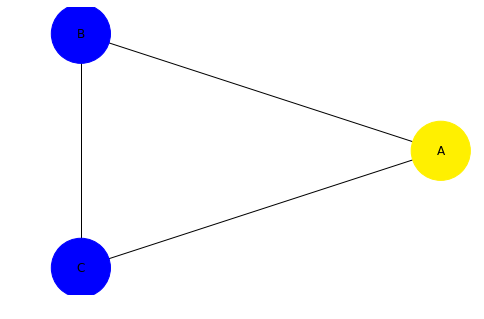

Fahrzeug 0, Passagiere steigenaus, time 22
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


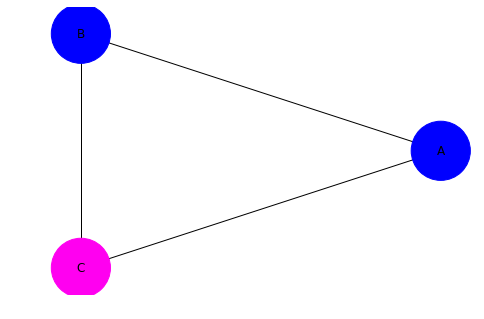

Fahrzeug 1, Passagiere steigenaus, time 22
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


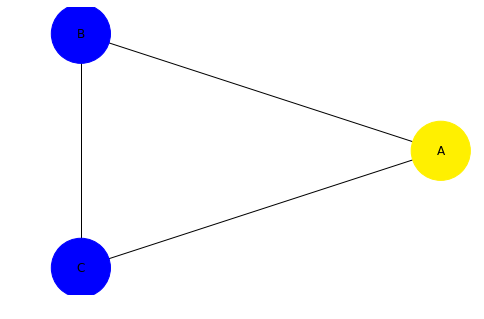

Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 34
Passagier: {'station': 1, 'exit_time': 10}
time: 34
Passagier: {'station': 1, 'exit_time': 10}
time: 34
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


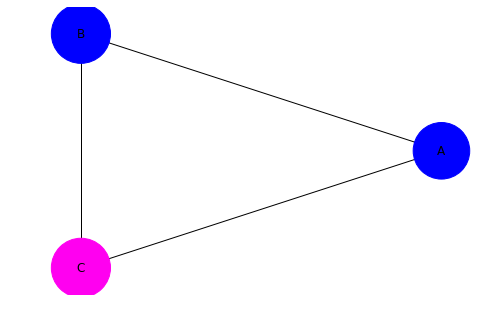

Fahrzeug 1 load
Fahrzeug 1 hat 4 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 34
Passagier: {'station': 1, 'exit_time': 20}
time: 44
Passagier: {'station': 0, 'exit_time': 10}
time: 34
Passagier: {'station': 0, 'exit_time': 10}
time: 34
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


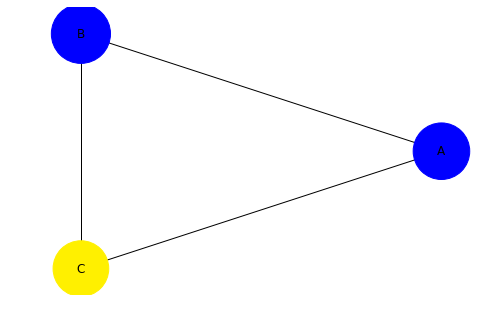

Fahrzeug 0, Passagiere steigenaus, time 32
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


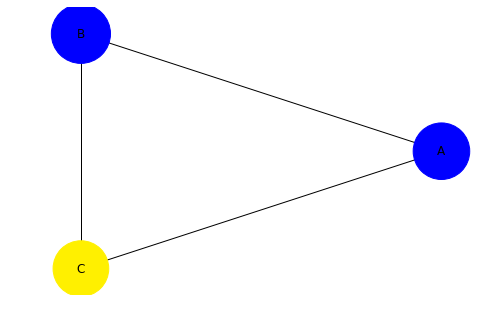

Fahrzeug 0, Passagiere steigenaus, time 32
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


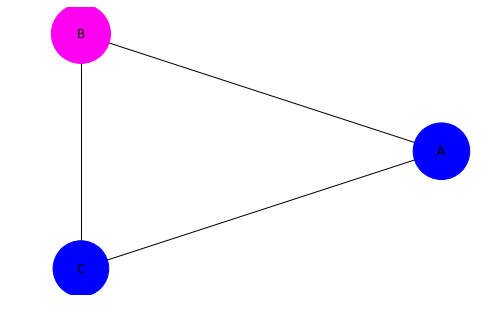

Fahrzeug 1, Passagiere steigenaus, time 32
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


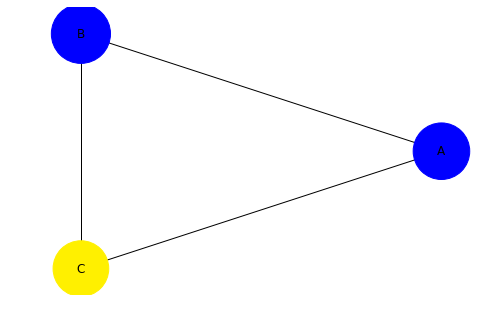

Fahrzeug 0, Passagiere steigenaus, time 34
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


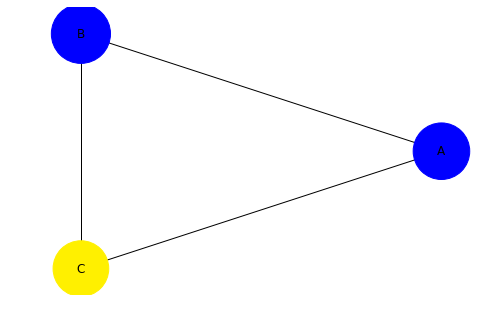

Fahrzeug 0, Passagiere steigenaus, time 34
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


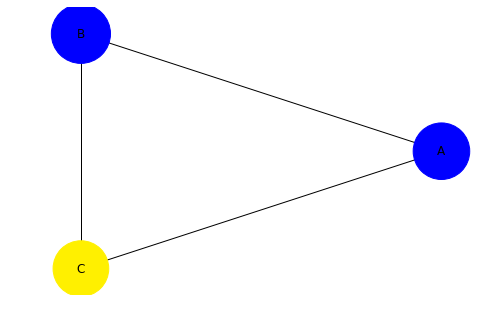

Fahrzeug 0, Passagiere steigenaus, time 34
Es sind 0 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


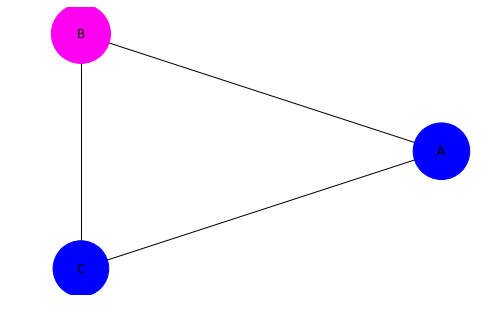

Fahrzeug 1, Passagiere steigenaus, time 34
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


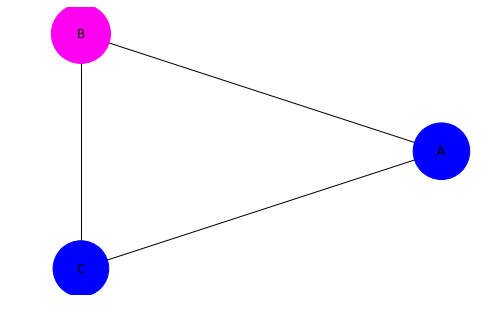

Fahrzeug 1, Passagiere steigenaus, time 34
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


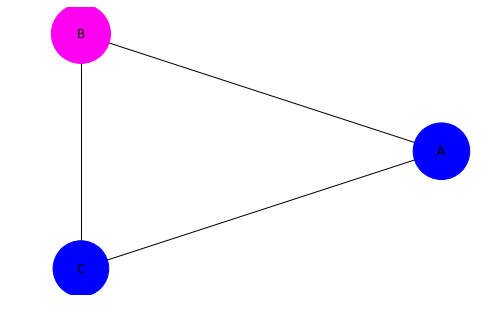

Fahrzeug 1, Passagiere steigenaus, time 34
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


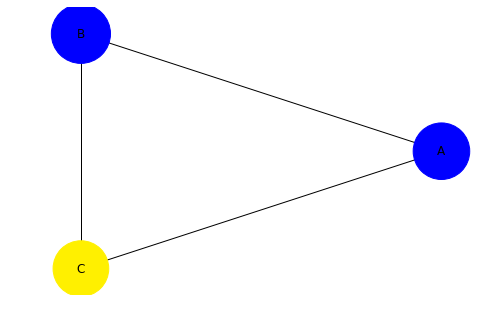

Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 56
Passagier: {'station': 0, 'exit_time': 10}
time: 46
Passagier: {'station': 1, 'exit_time': 20}
time: 56
Passagier: {'station': 1, 'exit_time': 20}
time: 56
Passagier: {'station': 1, 'exit_time': 20}
time: 56
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


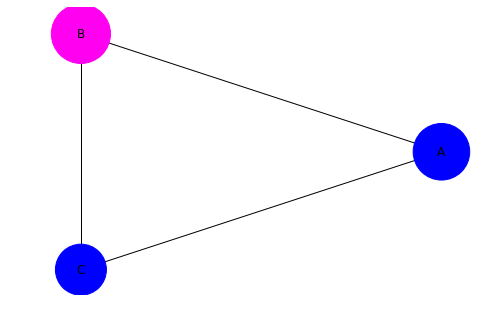

Fahrzeug 1 load
Fahrzeug 1 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 46
Passagier: {'station': 2, 'exit_time': 10}
time: 46
Passagier: {'station': 0, 'exit_time': 20}
time: 56
Passagier: {'station': 0, 'exit_time': 20}
time: 56
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


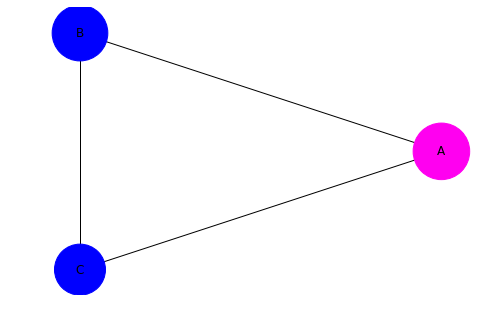

Fahrzeug 1, Passagiere steigenaus, time 44
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


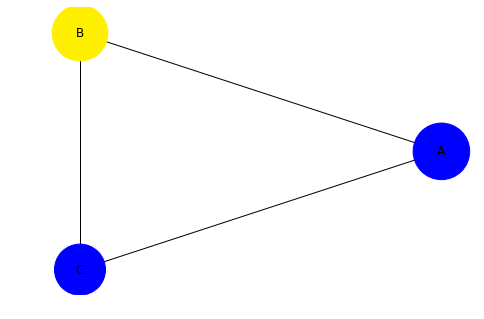

Fahrzeug 0, Passagiere steigenaus, time 46
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


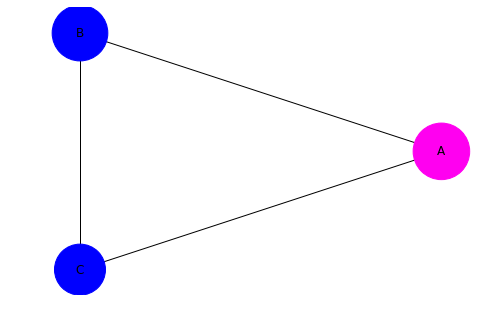

Fahrzeug 1, Passagiere steigenaus, time 46
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


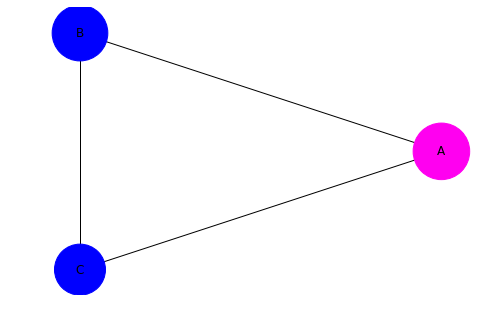

Fahrzeug 1, Passagiere steigenaus, time 46
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


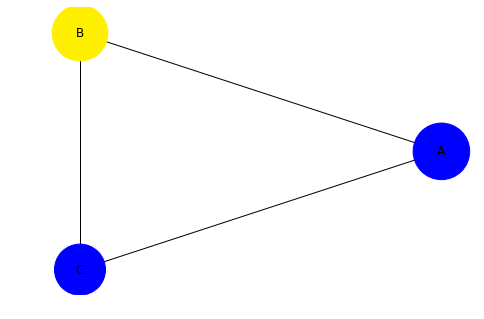

Fahrzeug 0 load
Fahrzeug 0 hat 1 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 68
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


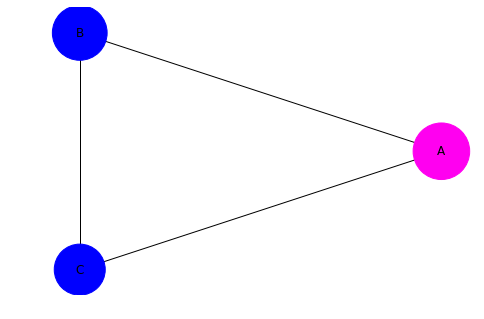

Fahrzeug 1 load
Fahrzeug 1 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 58
Passagier: {'station': 2, 'exit_time': 20}
time: 68
Passagier: {'station': 2, 'exit_time': 20}
time: 68
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


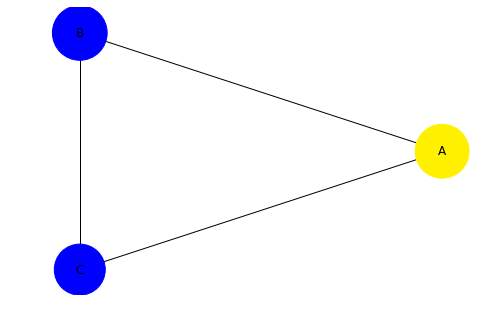

Fahrzeug 0, Passagiere steigenaus, time 56
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


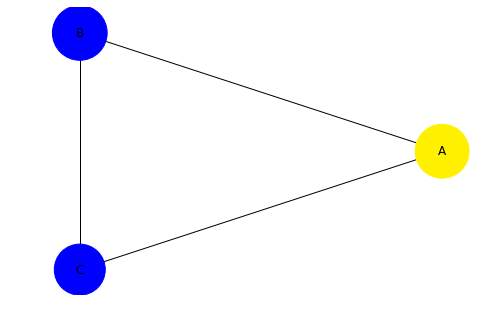

Fahrzeug 0, Passagiere steigenaus, time 56
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


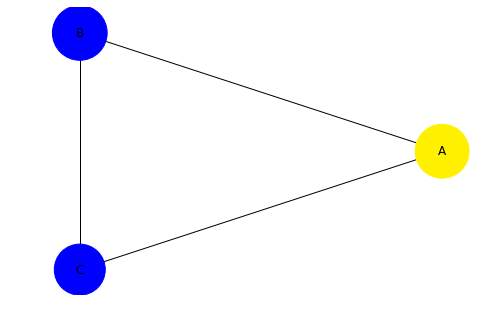

Fahrzeug 0, Passagiere steigenaus, time 56
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


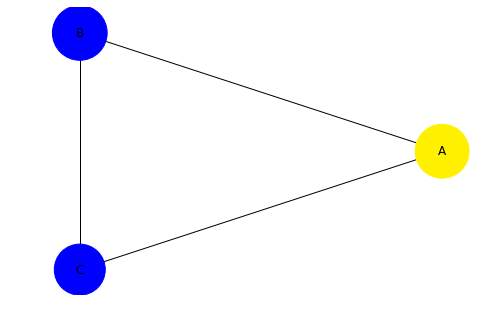

Fahrzeug 0, Passagiere steigenaus, time 56
Es sind 1 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


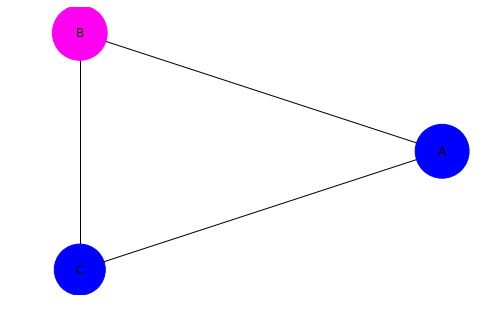

Fahrzeug 1, Passagiere steigenaus, time 56
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


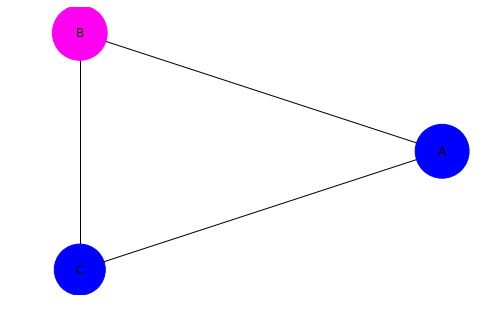

Fahrzeug 1, Passagiere steigenaus, time 56
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


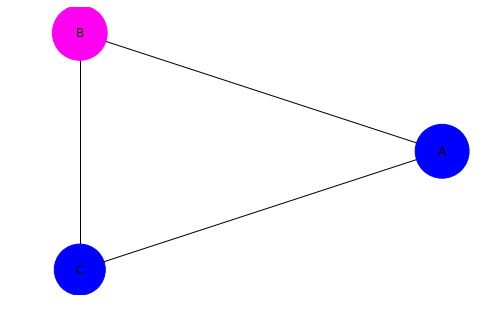

Fahrzeug 1, Passagiere steigenaus, time 58
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


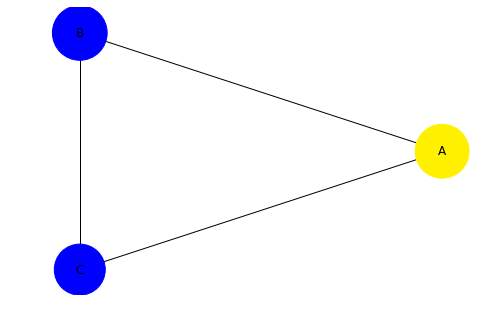

Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 70
Passagier: {'station': 2, 'exit_time': 20}
time: 80
Passagier: {'station': 1, 'exit_time': 10}
time: 70
Passagier: {'station': 1, 'exit_time': 10}
time: 70
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


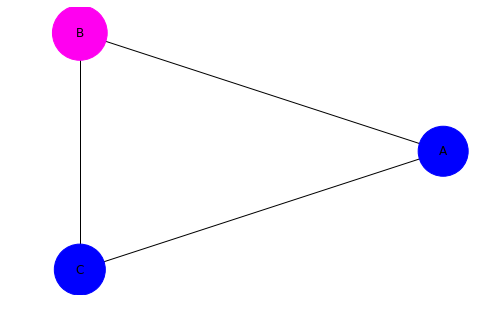

Fahrzeug 1 load
Fahrzeug 1 hat 3 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 70
Passagier: {'station': 0, 'exit_time': 20}
time: 80
Passagier: {'station': 2, 'exit_time': 10}
time: 70
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


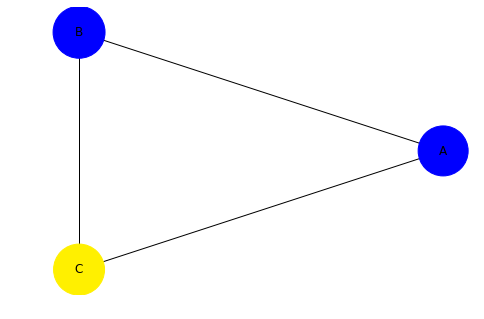

Fahrzeug 0, Passagiere steigenaus, time 68
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


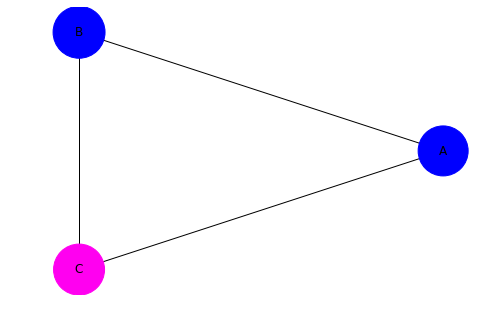

Fahrzeug 1, Passagiere steigenaus, time 68
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


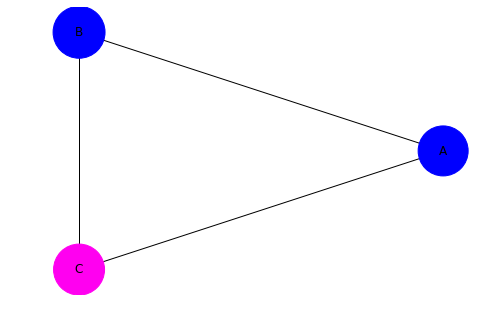

Fahrzeug 1, Passagiere steigenaus, time 68
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


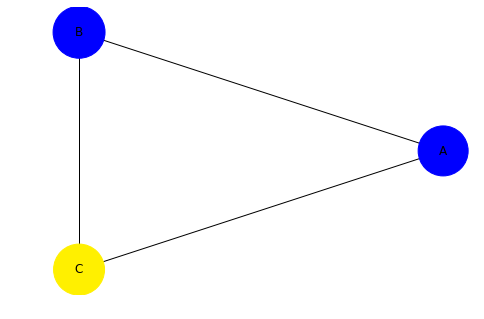

Fahrzeug 0, Passagiere steigenaus, time 70
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


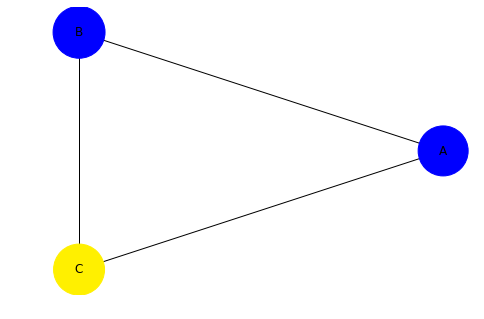

Fahrzeug 0, Passagiere steigenaus, time 70
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


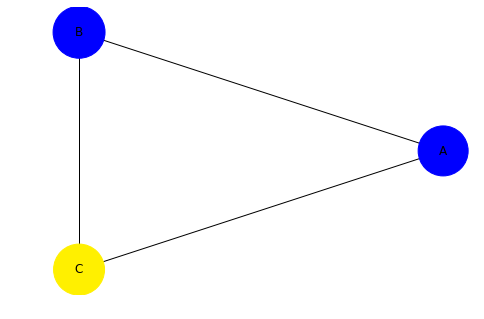

Fahrzeug 0, Passagiere steigenaus, time 70
Es sind 1 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


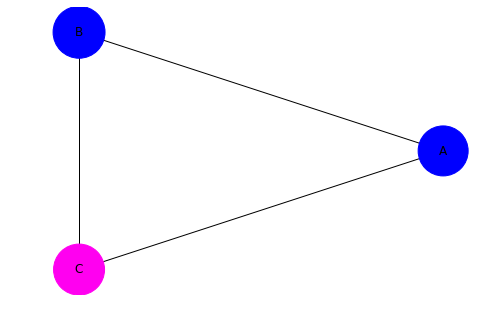

Fahrzeug 1, Passagiere steigenaus, time 70
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


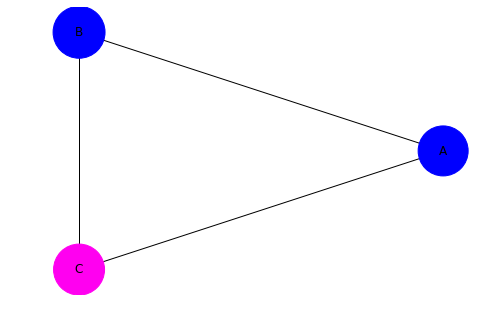

Fahrzeug 1, Passagiere steigenaus, time 70
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


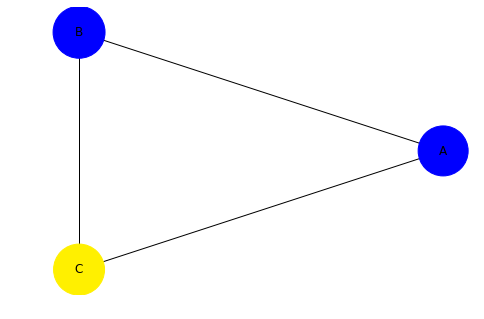

Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 92
Passagier: {'station': 1, 'exit_time': 20}
time: 92
Passagier: {'station': 0, 'exit_time': 10}
time: 82
Passagier: {'station': 1, 'exit_time': 20}
time: 92
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


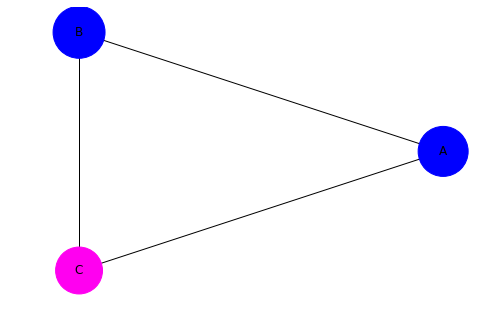

Fahrzeug 1 load
Fahrzeug 1 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 92
Passagier: {'station': 0, 'exit_time': 10}
time: 82
Passagier: {'station': 1, 'exit_time': 20}
time: 92
Passagier: {'station': 1, 'exit_time': 20}
time: 92
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


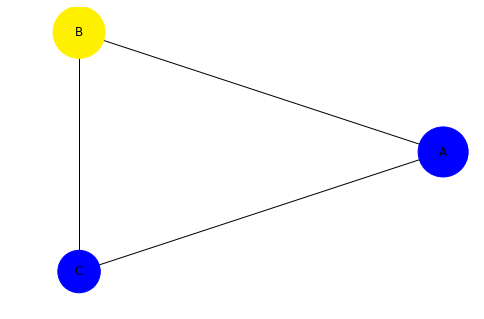

Fahrzeug 0, Passagiere steigenaus, time 80
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


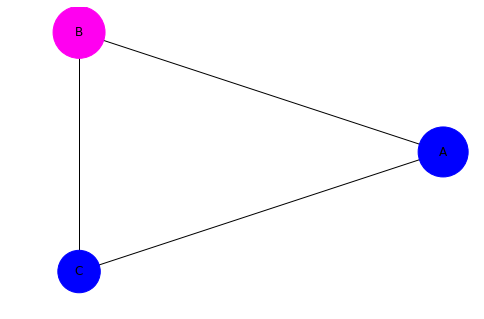

Fahrzeug 1, Passagiere steigenaus, time 80
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


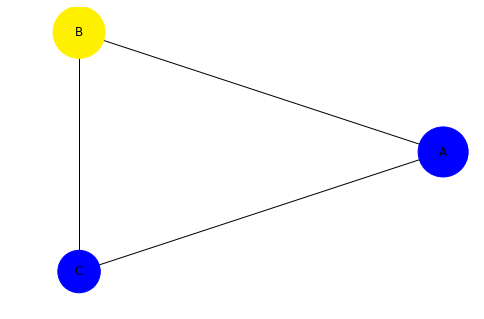

Fahrzeug 0, Passagiere steigenaus, time 82
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


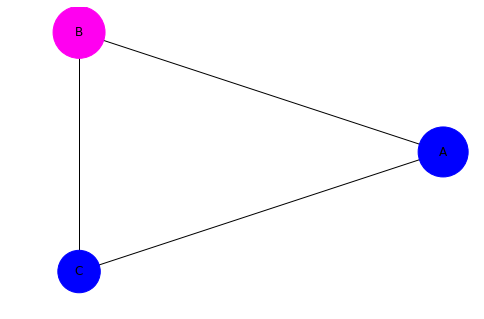

Fahrzeug 1, Passagiere steigenaus, time 82
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


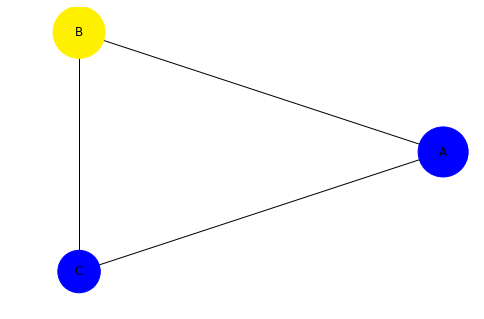

Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 104
Passagier: {'station': 0, 'exit_time': 20}
time: 104
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


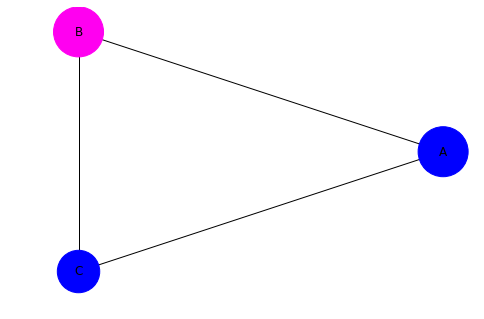

Fahrzeug 1 load
Fahrzeug 1 hat 2 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 94
Passagier: {'station': 0, 'exit_time': 20}
time: 104
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


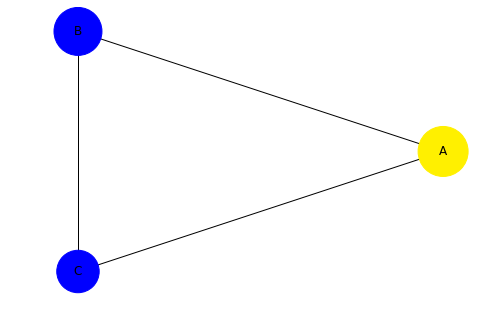

Fahrzeug 0, Passagiere steigenaus, time 92
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


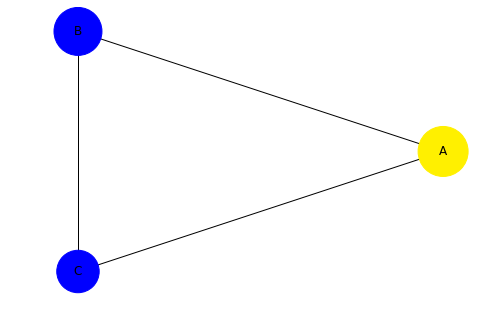

Fahrzeug 0, Passagiere steigenaus, time 92
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


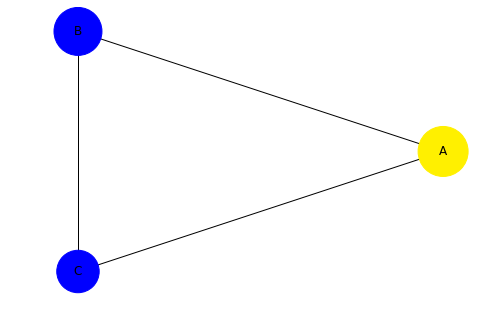

Fahrzeug 0, Passagiere steigenaus, time 92
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


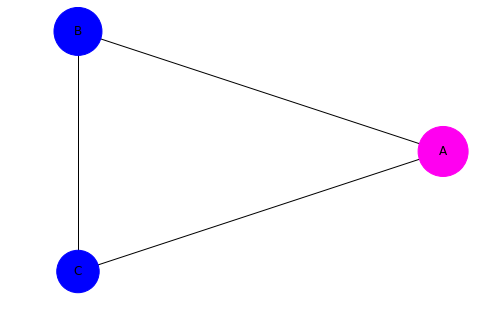

Fahrzeug 1, Passagiere steigenaus, time 92
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


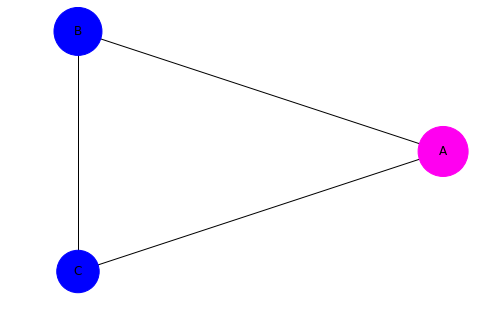

Fahrzeug 1, Passagiere steigenaus, time 92
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


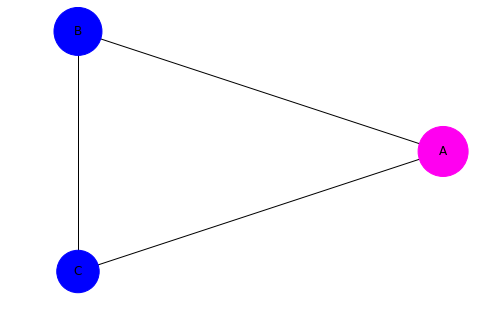

Fahrzeug 1, Passagiere steigenaus, time 92
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


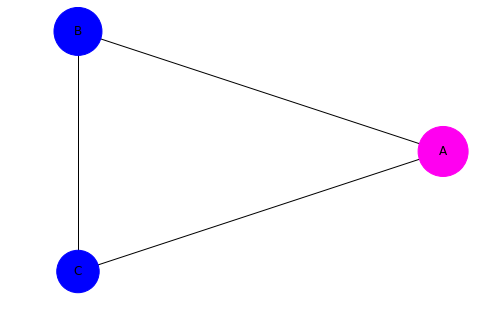

Fahrzeug 1, Passagiere steigenaus, time 94
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


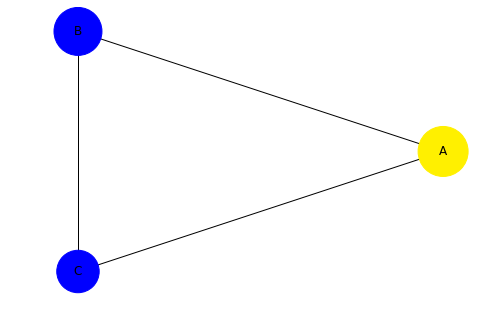

Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 106
Passagier: {'station': 1, 'exit_time': 10}
time: 106
Passagier: {'station': 1, 'exit_time': 10}
time: 106
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


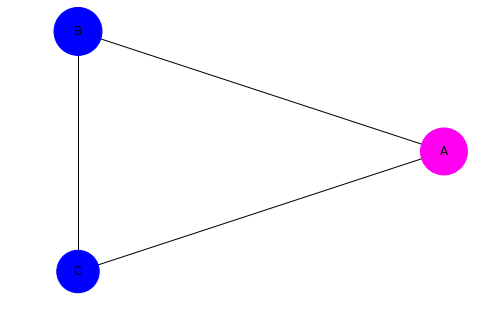

Fahrzeug 1 load
Fahrzeug 1 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 106
Passagier: {'station': 2, 'exit_time': 20}
time: 116
Passagier: {'station': 2, 'exit_time': 20}
time: 116
Passagier: {'station': 1, 'exit_time': 10}
time: 106
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


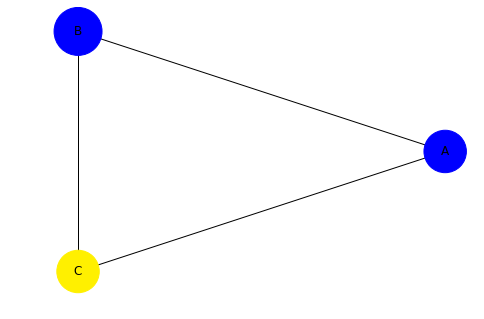

Fahrzeug 0, Passagiere steigenaus, time 104
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


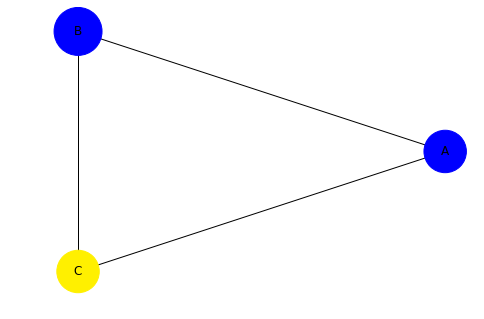

Fahrzeug 0, Passagiere steigenaus, time 104
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


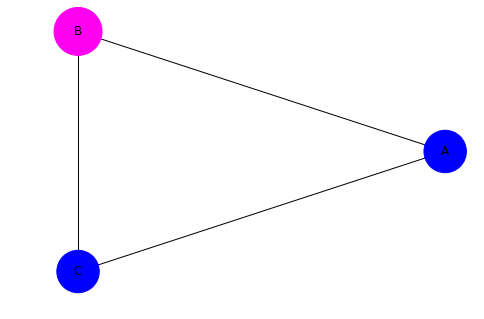

Fahrzeug 1, Passagiere steigenaus, time 104
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


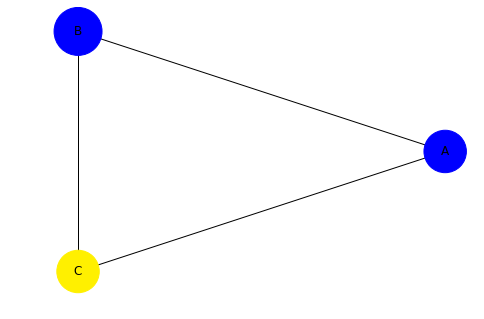

Fahrzeug 0, Passagiere steigenaus, time 106
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


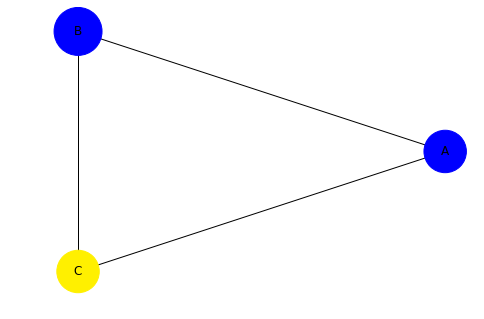

Fahrzeug 0, Passagiere steigenaus, time 106
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


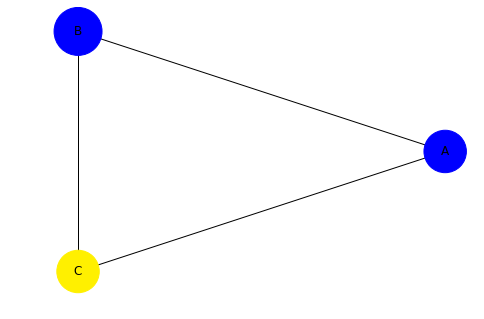

Fahrzeug 0, Passagiere steigenaus, time 106
Es sind 0 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


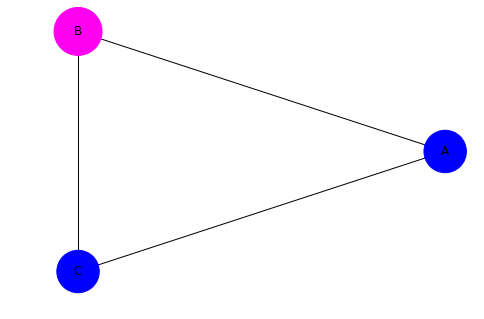

Fahrzeug 1, Passagiere steigenaus, time 106
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


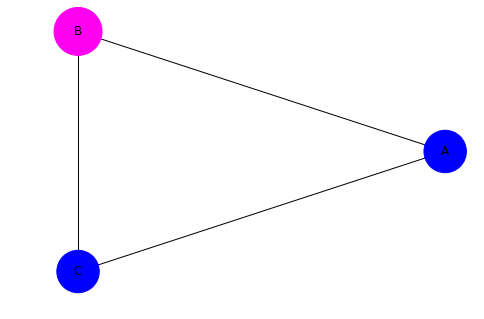

Fahrzeug 1, Passagiere steigenaus, time 106
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


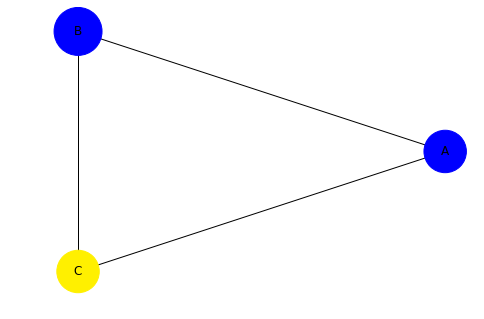

Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 10}
time: 118
Passagier: {'station': 1, 'exit_time': 20}
time: 128
Passagier: {'station': 1, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 10}
time: 118
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


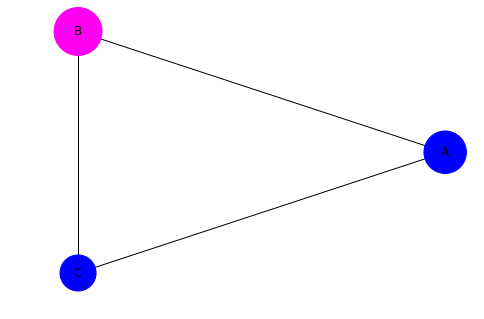

Fahrzeug 1 load
Fahrzeug 1 hat 3 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 118
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 2, 'exit_time': 10}
time: 118
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


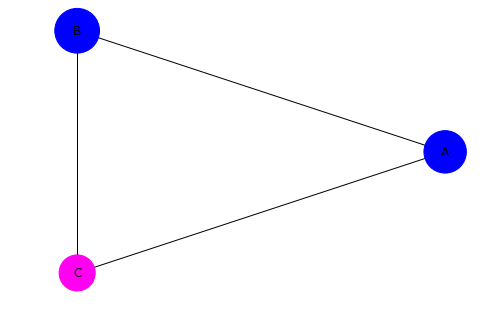

Fahrzeug 1, Passagiere steigenaus, time 116
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


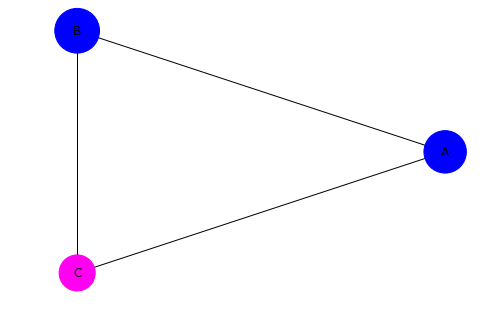

Fahrzeug 1, Passagiere steigenaus, time 116
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


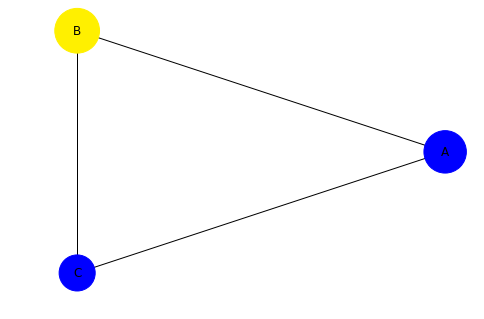

Fahrzeug 0, Passagiere steigenaus, time 118
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


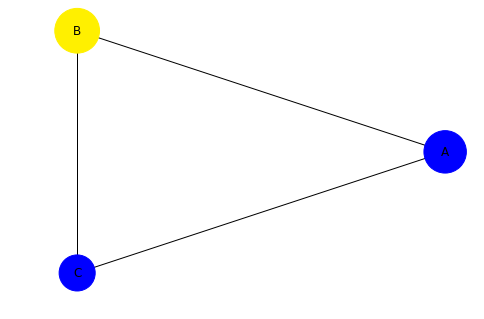

Fahrzeug 0, Passagiere steigenaus, time 118
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


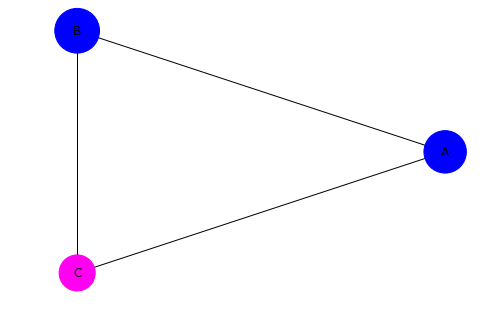

Fahrzeug 1, Passagiere steigenaus, time 118
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


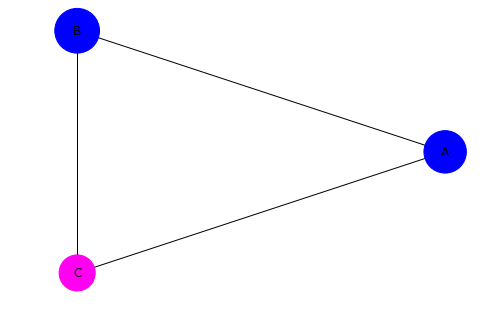

Fahrzeug 1, Passagiere steigenaus, time 118
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


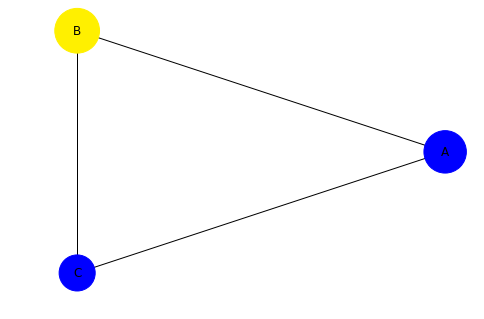

Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 130
Passagier: {'station': 0, 'exit_time': 20}
time: 140
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


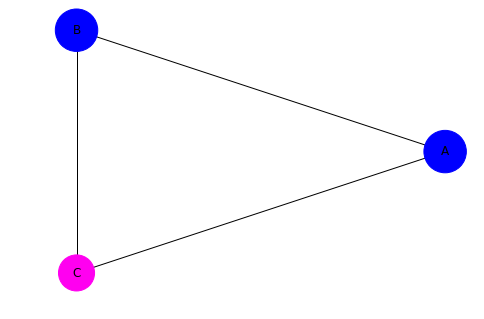

Fahrzeug 1 load
Fahrzeug 1 hat 4 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 130
Passagier: {'station': 0, 'exit_time': 10}
time: 130
Passagier: {'station': 1, 'exit_time': 20}
time: 140
Passagier: {'station': 1, 'exit_time': 20}
time: 140
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


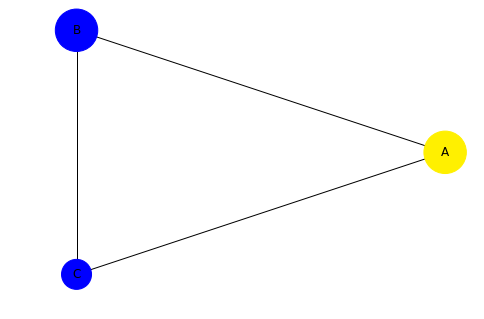

Fahrzeug 0, Passagiere steigenaus, time 128
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


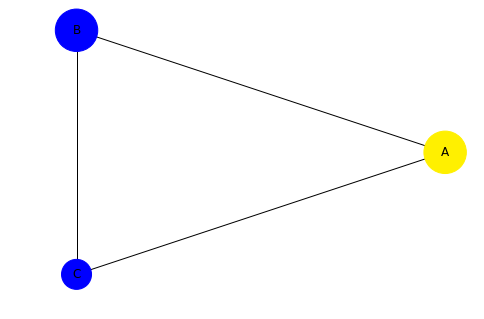

Fahrzeug 0, Passagiere steigenaus, time 128
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


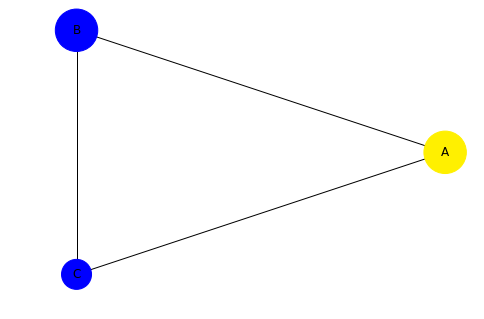

Fahrzeug 0, Passagiere steigenaus, time 128
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


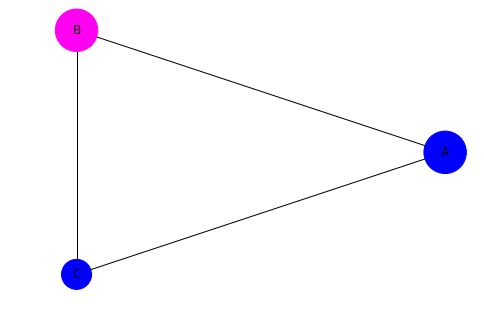

Fahrzeug 1, Passagiere steigenaus, time 128
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


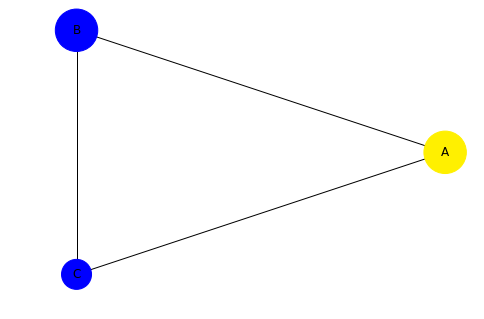

Fahrzeug 0, Passagiere steigenaus, time 130
Es sind 1 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


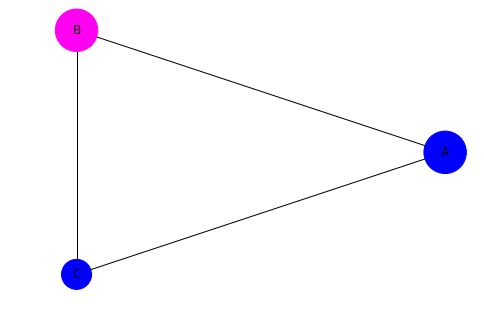

Fahrzeug 1, Passagiere steigenaus, time 130
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


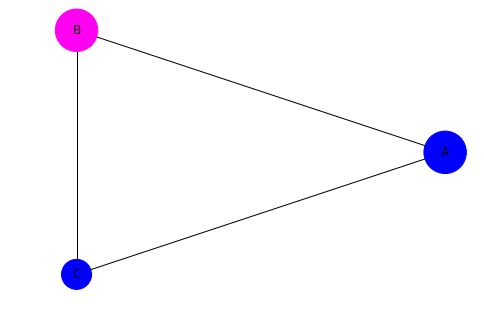

Fahrzeug 1, Passagiere steigenaus, time 130
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


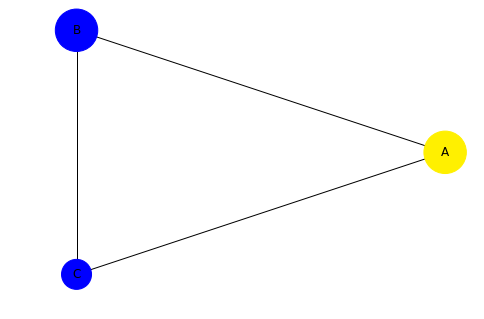

Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 152
Passagier: {'station': 2, 'exit_time': 20}
time: 152
Passagier: {'station': 2, 'exit_time': 20}
time: 152
Passagier: {'station': 1, 'exit_time': 10}
time: 142
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


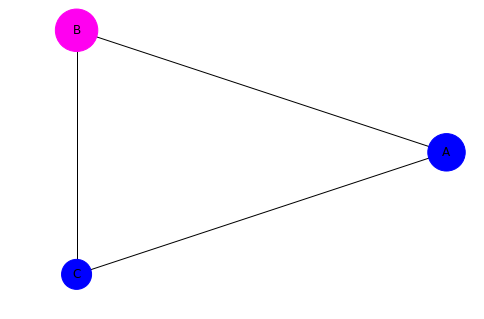

Fahrzeug 1 load
Fahrzeug 1 hat 3 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 152
Passagier: {'station': 2, 'exit_time': 10}
time: 142
Passagier: {'station': 0, 'exit_time': 20}
time: 152
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


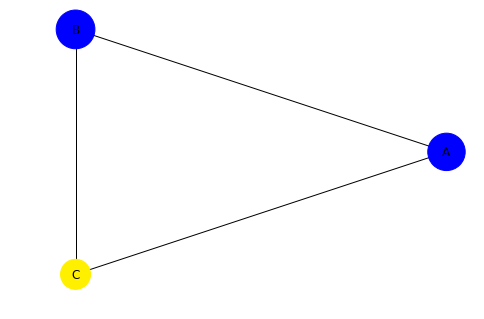

Fahrzeug 0, Passagiere steigenaus, time 140
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


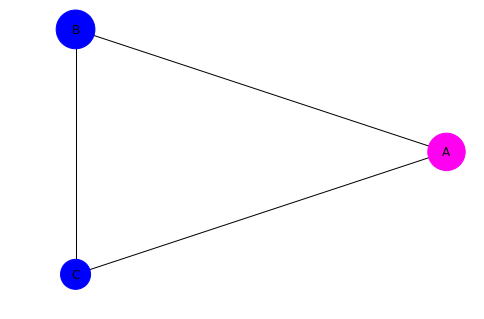

Fahrzeug 1, Passagiere steigenaus, time 140
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


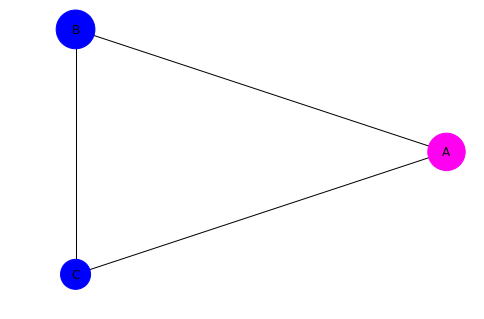

Fahrzeug 1, Passagiere steigenaus, time 140
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


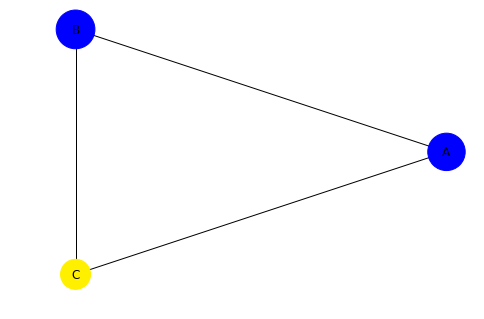

Fahrzeug 0, Passagiere steigenaus, time 142
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


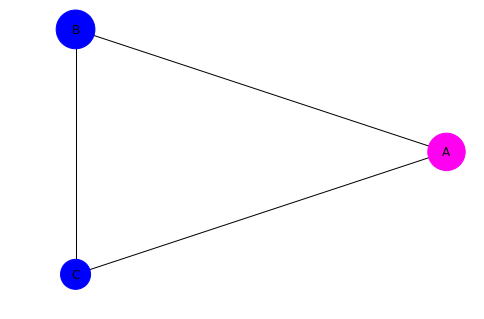

Fahrzeug 1, Passagiere steigenaus, time 142
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


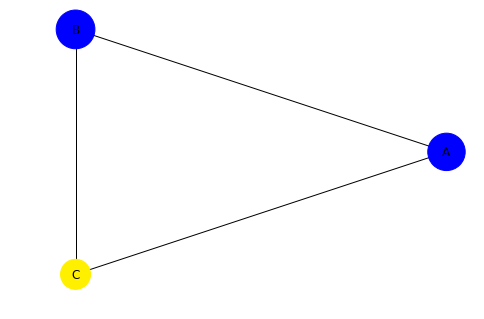

Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 154
Passagier: {'station': 0, 'exit_time': 10}
time: 154
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


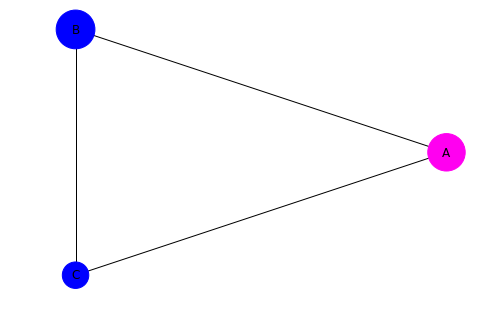

Fahrzeug 1 load
Fahrzeug 1 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 154
Passagier: {'station': 2, 'exit_time': 20}
time: 164
Passagier: {'station': 1, 'exit_time': 10}
time: 154
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


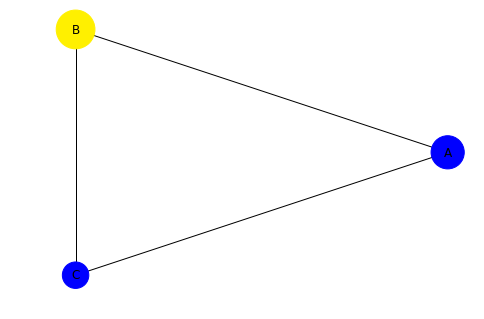

Fahrzeug 0, Passagiere steigenaus, time 152
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


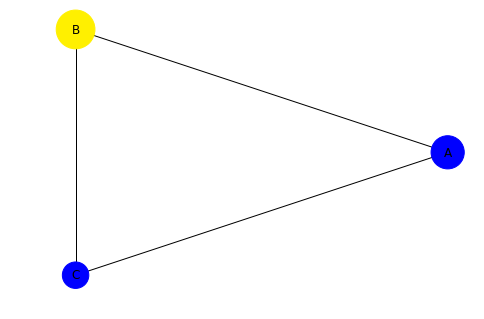

Fahrzeug 0, Passagiere steigenaus, time 152
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


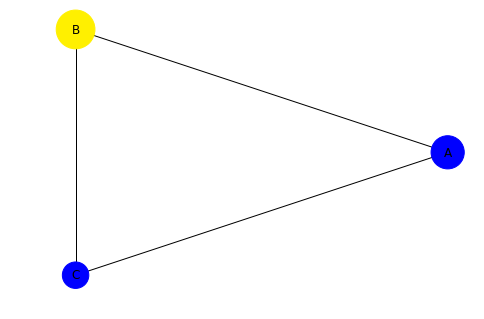

Fahrzeug 0, Passagiere steigenaus, time 152
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


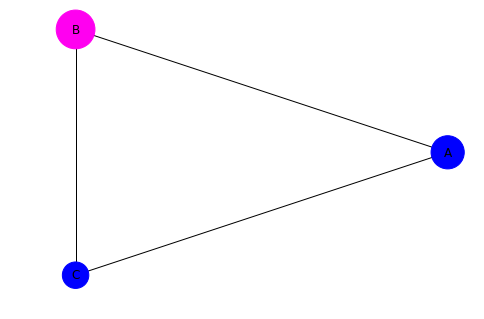

Fahrzeug 1, Passagiere steigenaus, time 152
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


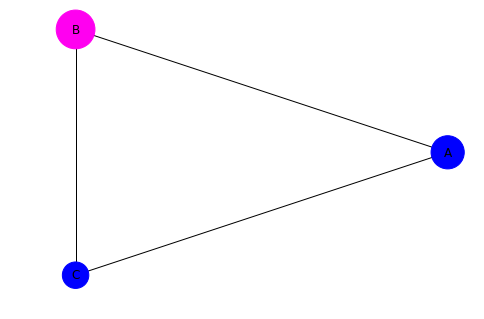

Fahrzeug 1, Passagiere steigenaus, time 152
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


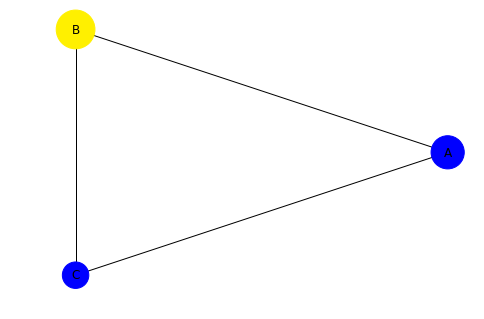

Fahrzeug 0, Passagiere steigenaus, time 154
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


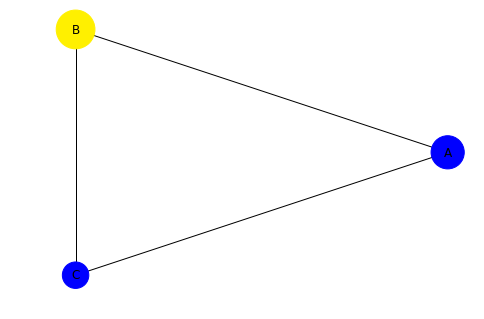

Fahrzeug 0, Passagiere steigenaus, time 154
Es sind 0 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


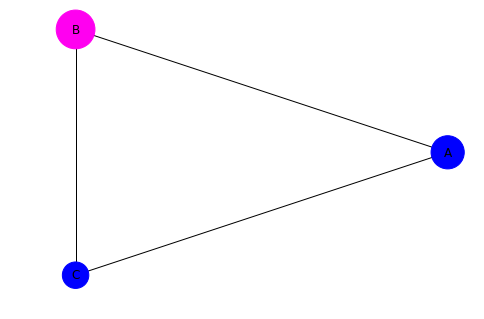

Fahrzeug 1, Passagiere steigenaus, time 154
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


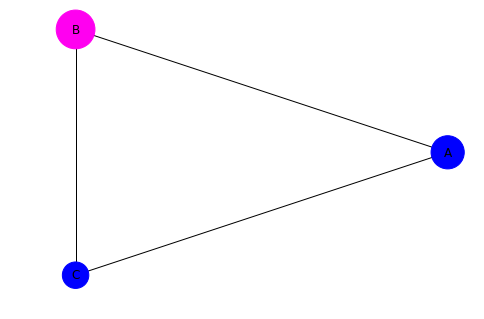

Fahrzeug 1, Passagiere steigenaus, time 154
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


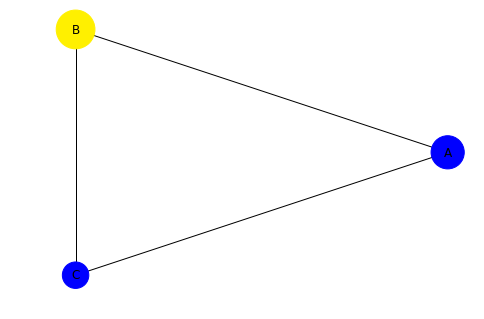

Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 166
Passagier: {'station': 2, 'exit_time': 10}
time: 166
Passagier: {'station': 0, 'exit_time': 20}
time: 176
Passagier: {'station': 0, 'exit_time': 20}
time: 176
Passagier: {'station': 0, 'exit_time': 20}
time: 176
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


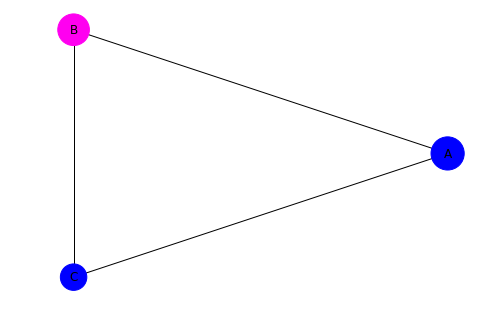

Fahrzeug 1 load
Fahrzeug 1 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 166
Passagier: {'station': 2, 'exit_time': 10}
time: 166
Passagier: {'station': 2, 'exit_time': 10}
time: 166
Passagier: {'station': 0, 'exit_time': 20}
time: 176
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


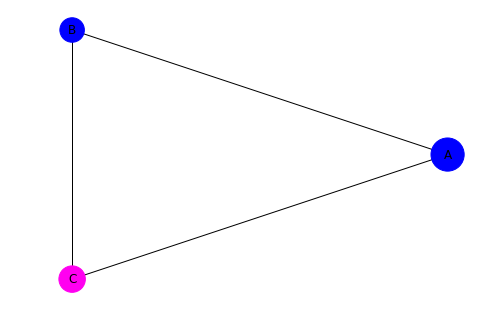

Fahrzeug 1, Passagiere steigenaus, time 164
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


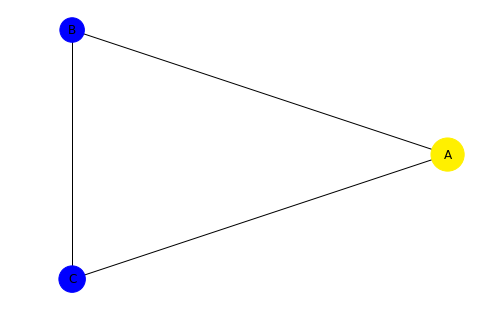

Fahrzeug 0, Passagiere steigenaus, time 166
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


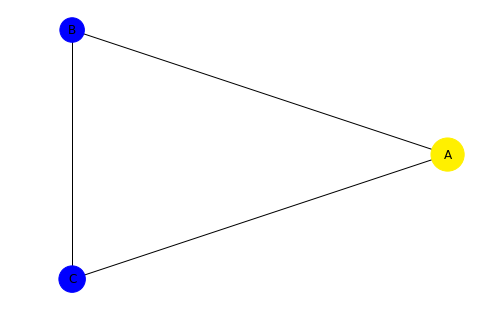

Fahrzeug 0, Passagiere steigenaus, time 166
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


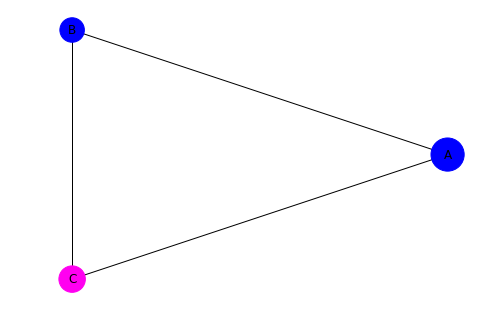

Fahrzeug 1, Passagiere steigenaus, time 166
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


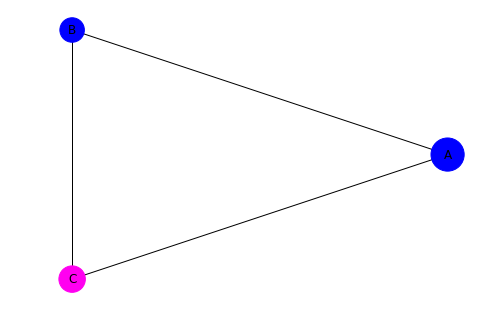

Fahrzeug 1, Passagiere steigenaus, time 166
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


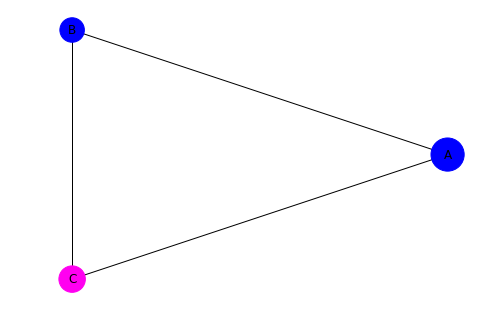

Fahrzeug 1, Passagiere steigenaus, time 166
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


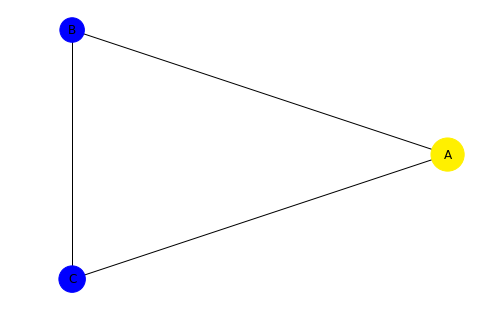

Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 188
Passagier: {'station': 1, 'exit_time': 10}
time: 178
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


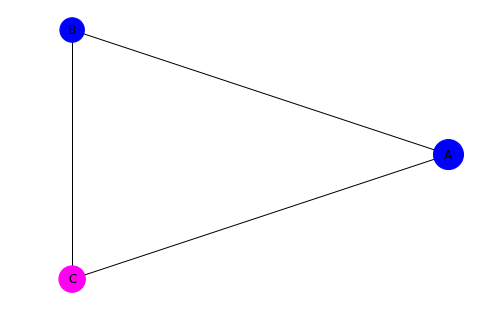

Fahrzeug 1 load
Fahrzeug 1 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 188
Passagier: {'station': 0, 'exit_time': 10}
time: 178
Passagier: {'station': 0, 'exit_time': 10}
time: 178
Passagier: {'station': 1, 'exit_time': 20}
time: 188
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


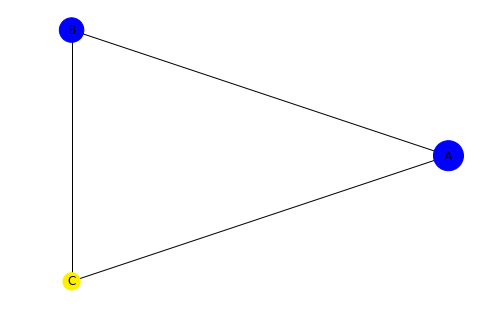

Fahrzeug 0, Passagiere steigenaus, time 176
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


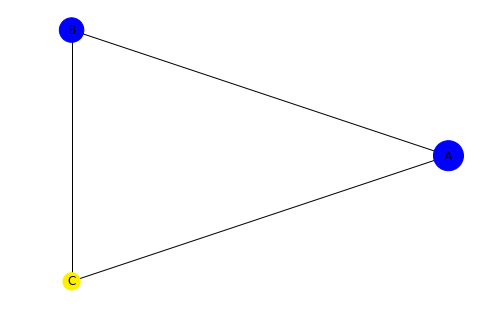

Fahrzeug 0, Passagiere steigenaus, time 176
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


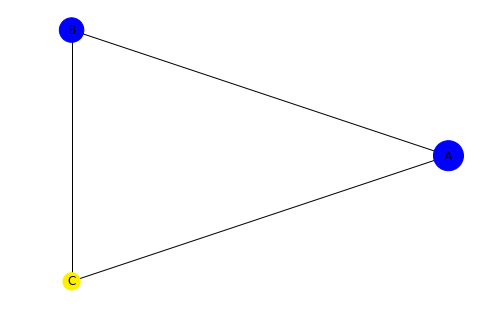

Fahrzeug 0, Passagiere steigenaus, time 176
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


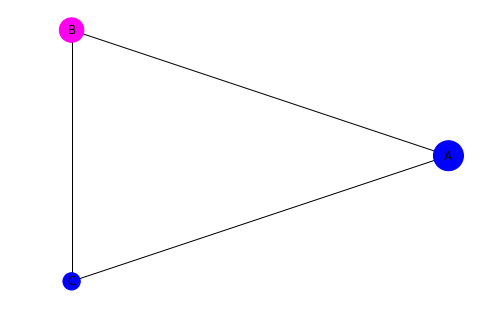

Fahrzeug 1, Passagiere steigenaus, time 176
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


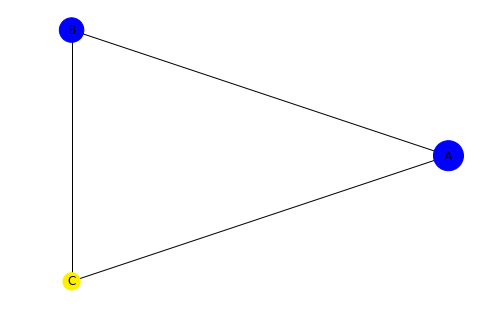

Fahrzeug 0, Passagiere steigenaus, time 178
Es sind 1 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


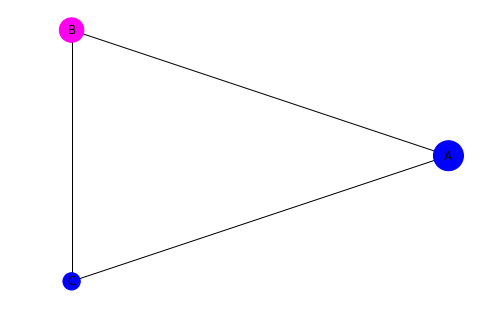

Fahrzeug 1, Passagiere steigenaus, time 178
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


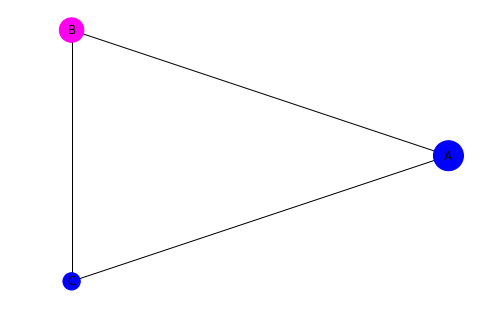

Fahrzeug 1, Passagiere steigenaus, time 178
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


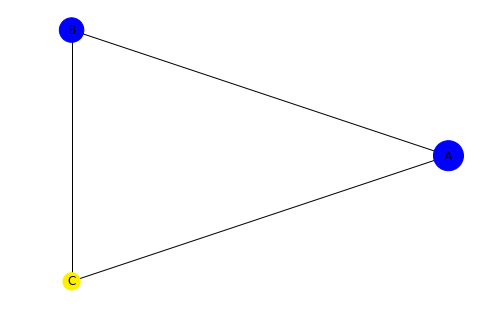

Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 190
Passagier: {'station': 0, 'exit_time': 10}
time: 190
Passagier: {'station': 0, 'exit_time': 10}
time: 190
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


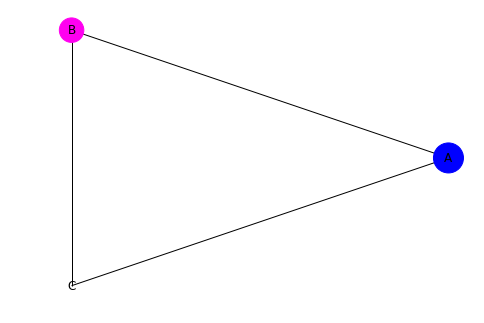

Fahrzeug 1 load
Fahrzeug 1 hat 3 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 190
Passagier: {'station': 0, 'exit_time': 20}
time: 200
Passagier: {'station': 2, 'exit_time': 10}
time: 190
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


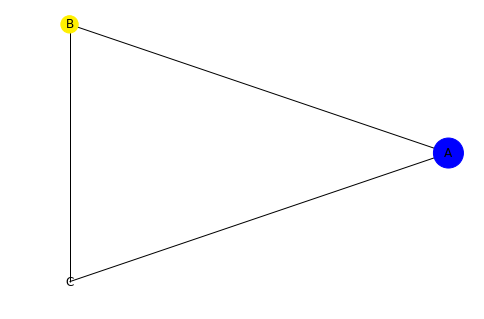

Fahrzeug 0, Passagiere steigenaus, time 188
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


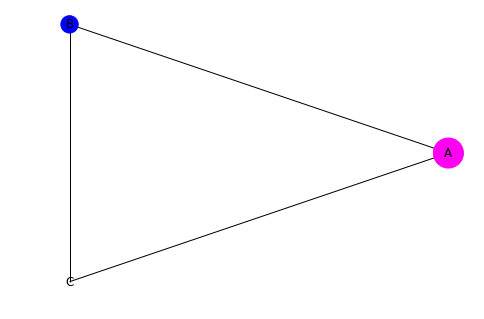

Fahrzeug 1, Passagiere steigenaus, time 188
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


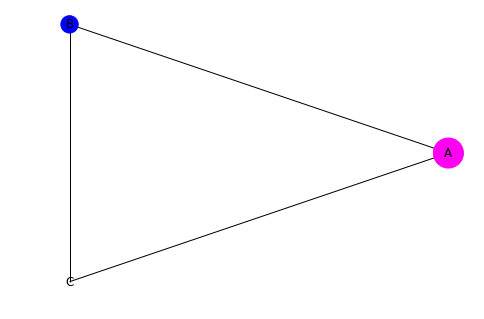

Fahrzeug 1, Passagiere steigenaus, time 188
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


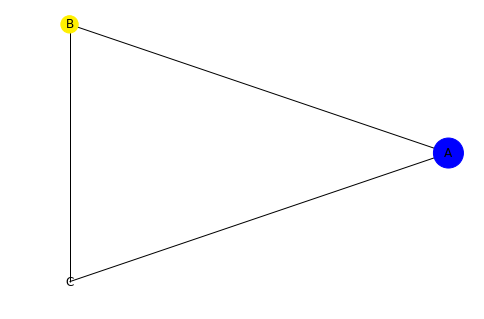

Fahrzeug 0, Passagiere steigenaus, time 190
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


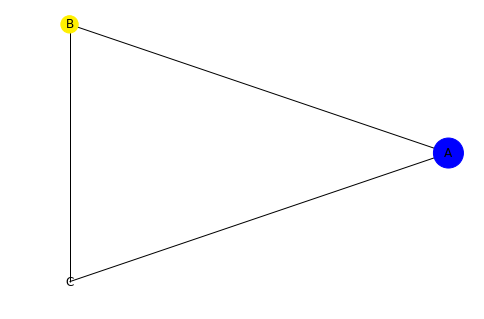

Fahrzeug 0, Passagiere steigenaus, time 190
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


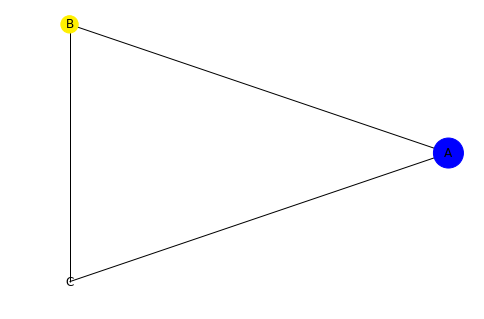

Fahrzeug 0, Passagiere steigenaus, time 190
Es sind 0 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


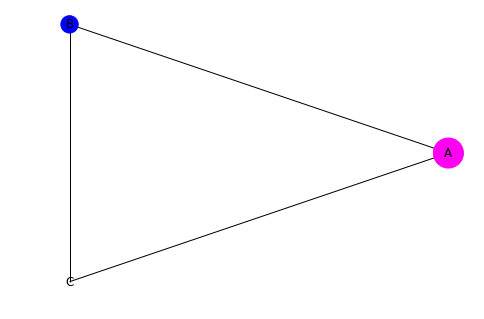

Fahrzeug 1, Passagiere steigenaus, time 190
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


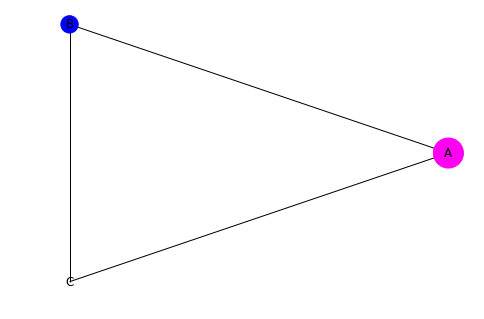

Fahrzeug 1, Passagiere steigenaus, time 190
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


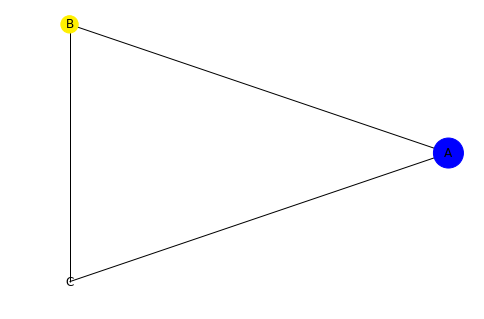

Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 202
Passagier: {'station': 2, 'exit_time': 10}
time: 202
Passagier: {'station': 0, 'exit_time': 20}
time: 212
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


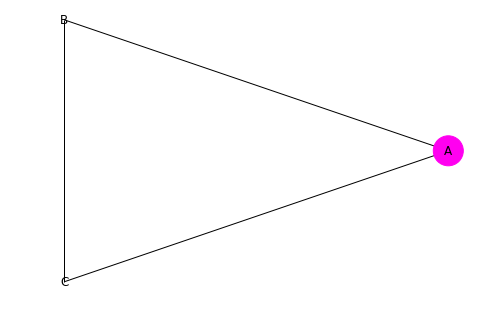

Fahrzeug 1 load
Fahrzeug 1 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 212
Passagier: {'station': 2, 'exit_time': 20}
time: 212
Passagier: {'station': 2, 'exit_time': 20}
time: 212
Passagier: {'station': 1, 'exit_time': 10}
time: 202
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


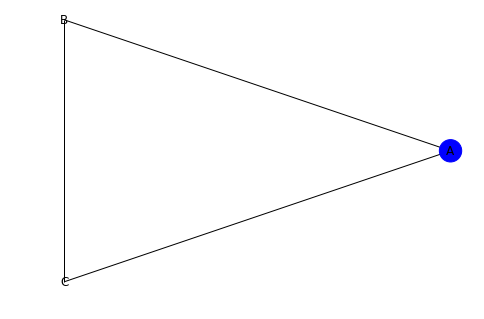

Fahrzeug 1, Passagiere steigenaus, time 200
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


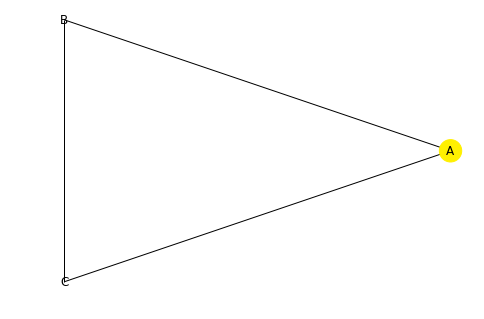

Fahrzeug 0, Passagiere steigenaus, time 202
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


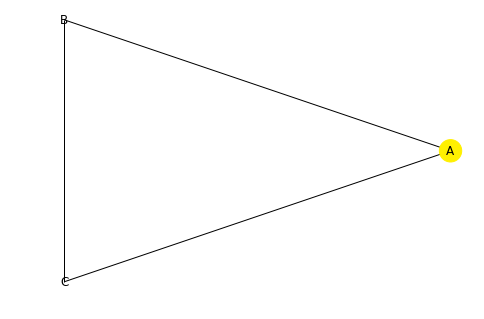

Fahrzeug 0, Passagiere steigenaus, time 202
Es sind 1 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


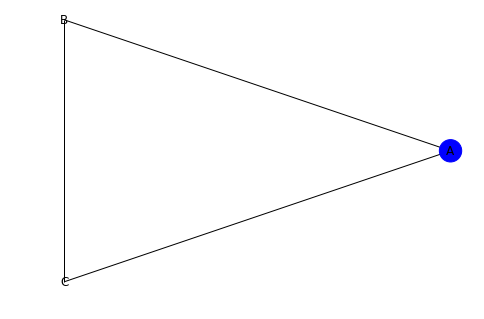

Fahrzeug 1, Passagiere steigenaus, time 202
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


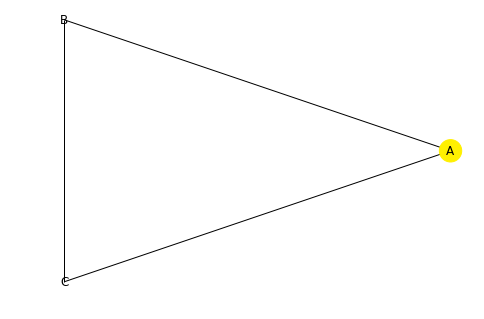

Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 224
Passagier: {'station': 2, 'exit_time': 20}
time: 224
Passagier: {'station': 2, 'exit_time': 20}
time: 224
Passagier: {'station': 2, 'exit_time': 20}
time: 224
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2


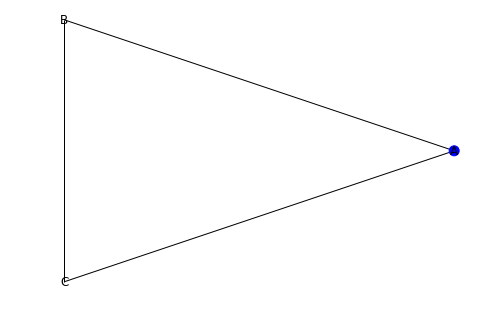

Fahrzeug 1 load
Fahrzeug 1 hat 2 Plätze frei
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


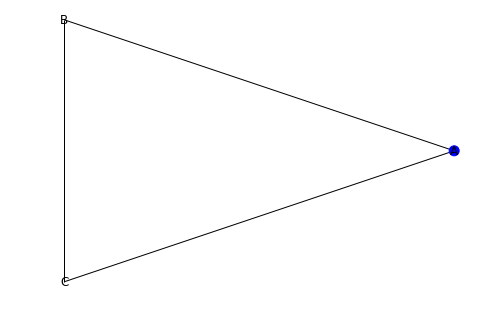

Fahrzeug 0, Passagiere steigenaus, time 212
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


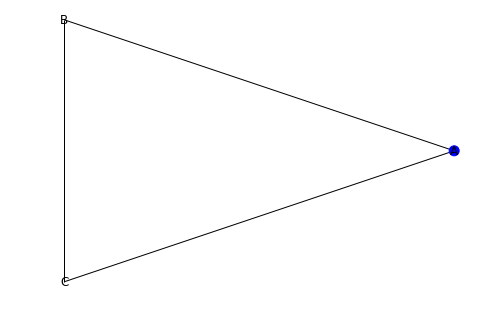

Fahrzeug 1, Passagiere steigenaus, time 212
Es sind 2 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


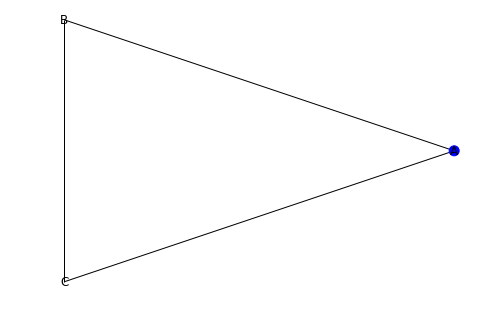

Fahrzeug 1, Passagiere steigenaus, time 212
Es sind 1 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


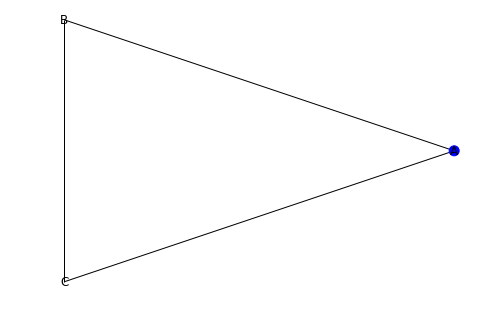

Fahrzeug 1, Passagiere steigenaus, time 212
Es sind 0 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


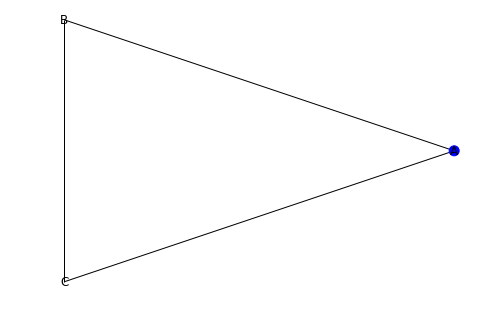

Fahrzeug 0 load
Fahrzeug 0 hat 1 Plätze frei
Fahrzeug 1 ist am Knoten 2, der nächste Halt 1


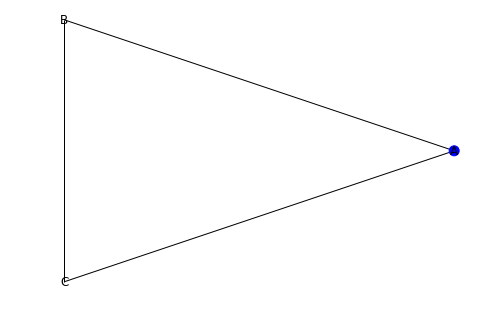

Fahrzeug 1 load
Fahrzeug 1 hat 5 Plätze frei
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


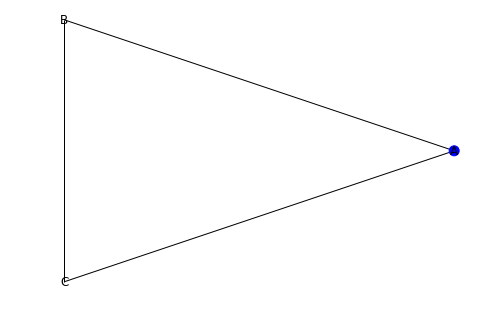

Fahrzeug 0, Passagiere steigenaus, time 224
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


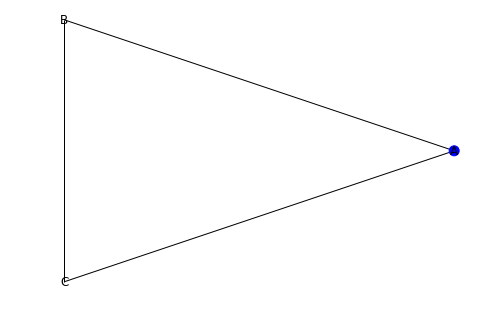

Fahrzeug 0, Passagiere steigenaus, time 224
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


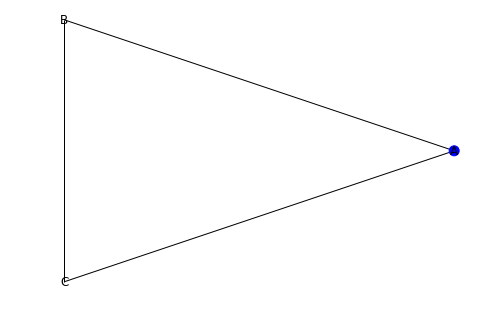

Fahrzeug 0, Passagiere steigenaus, time 224
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


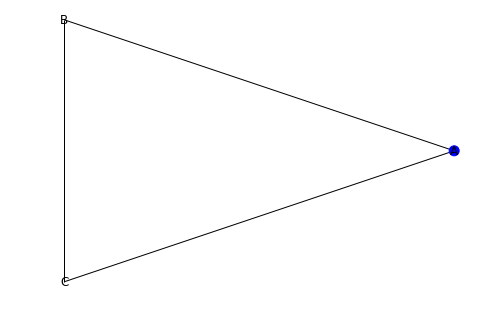

Fahrzeug 0, Passagiere steigenaus, time 224
Es sind 0 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0


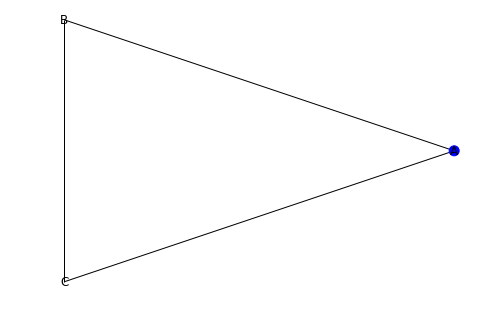

Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0


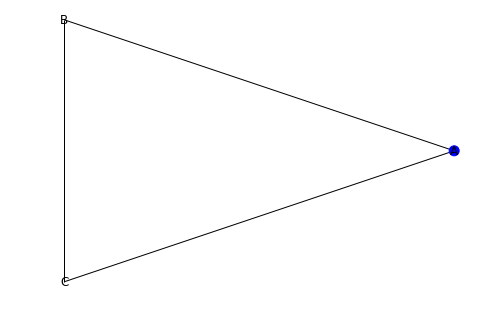

Fahrzeug 1 load
Fahrzeug 1 hat 5 Plätze frei
Fahrzeug 0 ist am Knoten 0, der nächste Halt 2


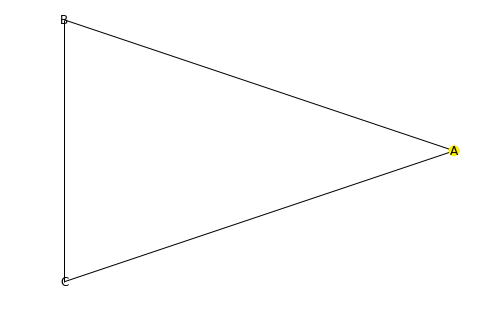

Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 250
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1


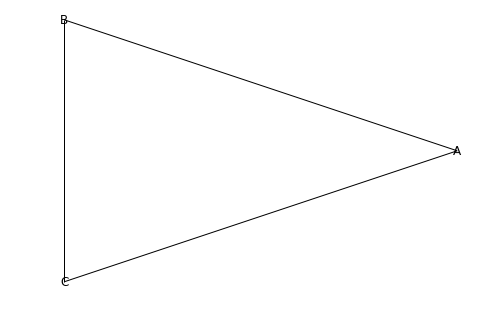

Fahrzeug 1 load
Fahrzeug 1 hat 5 Plätze frei
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1


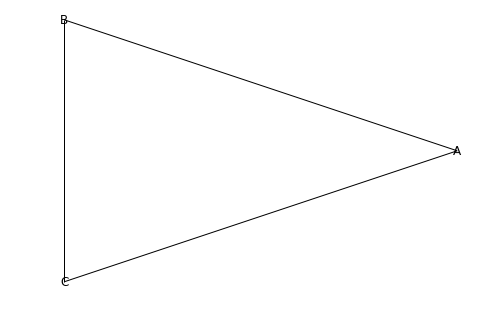

Fahrzeug 0, Passagiere steigenaus, time 250
Es sind 0 Passagiere in der Bahn
Ende


In [10]:
solve(eventq, passengers, bms, graph)